In [1343]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1344]:
## Reading the data
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1345]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [1346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


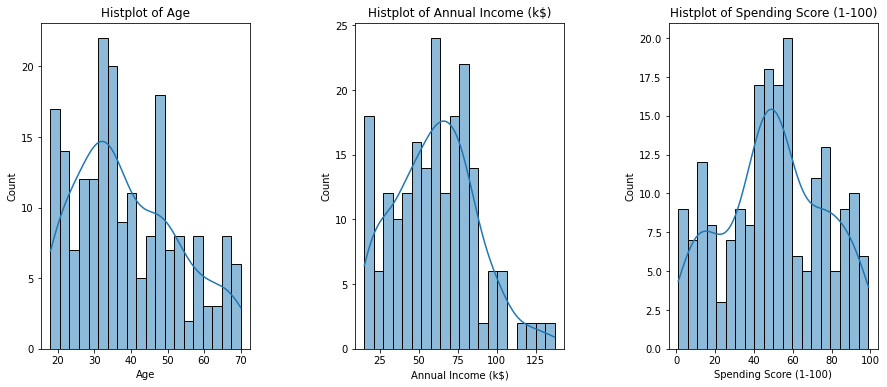

In [1347]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df, x=col, bins = 20, kde=True)
    plt.title('Histplot of {}'.format(col))
plt.show()

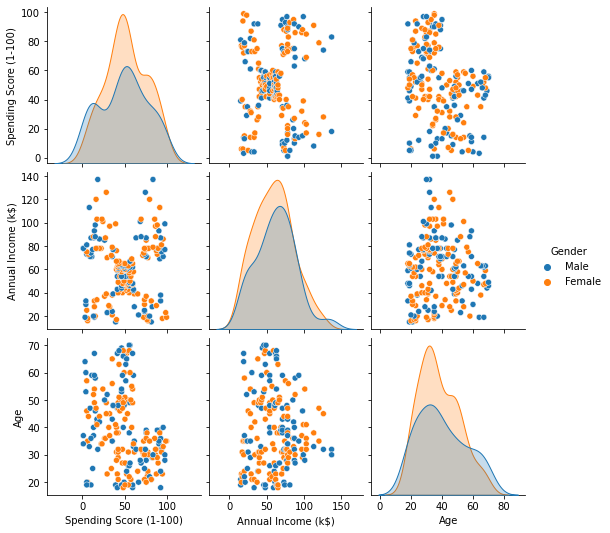

In [1348]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

[]

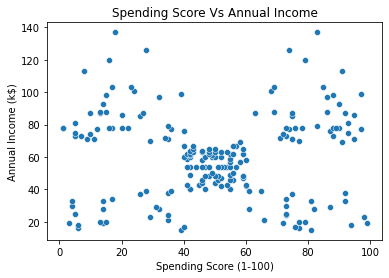

In [1349]:
plt.title("Spending Score Vs Annual Income")
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)")
plt.plot()

Observations

From the visualization above we can infer that Data can be categorized into 5 clusters based on income and spending score.

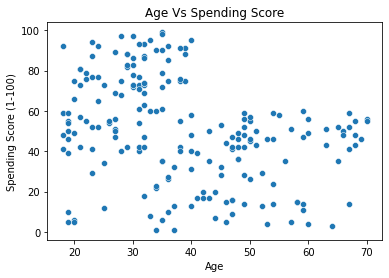

In [1350]:
plt.title("Age Vs Spending Score")
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

Observations

From the above plot we can infer that people between 20 - 40 are the ones who are spending more more likely because the are in the prime years and have high income to spend.

In [1351]:
# Perform One Hot Encoding for the Gender Column
# converting Gender column into Integer
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [1352]:
# Drop Female or either male to avoid duplication
df.drop('Gender_Female', axis = 1, inplace = True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


### Training the model

In [1353]:
# Importing all the necessary modules for predicting, finding right params and validation
from sklearn.cluster import KMeans

In [1354]:
# Calculating the best possible cluster
wss = []
for cluster in range(1, 11):
    KM = KMeans(n_clusters = cluster)
    KM.fit(df)
    wss.append(KM.inertia_)

In [1355]:
for index, rate in enumerate(wss):
    if index == 0:
        print("Cluster " + str(index) + " Diff in wss value: Not Applicable")
    else:
        print("Cluster " + str(index) + " Diff in wss value: " + str(wss[index - 1] - wss[index]))

Cluster 0 Diff in wss value: Not Applicable
Cluster 1 Diff in wss value: 588446.346228623
Cluster 2 Diff in wss value: 115669.15080534562
Cluster 3 Diff in wss value: 75995.36440611683
Cluster 4 Diff in wss value: 38217.232320598414
Cluster 5 Diff in wss value: 34546.408278214745
Cluster 6 Diff in wss value: 19404.540717234253
Cluster 7 Diff in wss value: 17179.342796092795
Cluster 8 Diff in wss value: 8240.732752711847
Cluster 9 Diff in wss value: 8616.693042634433


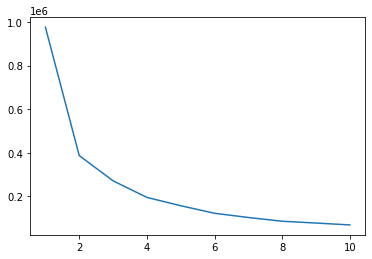

In [1356]:
# Plot of wss
plt.plot(range(1,11), wss)

From the above plot and calculation we can observe that K=5 will be right value.

In [1357]:
# Training the K-Means
k_means = KMeans(n_clusters = 5)
k_means.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])
k_means_labels = k_means.labels_

In [1358]:
# Adding the kmeans labels to our dataset for analysis
df['k_means_labels'] = k_means_labels
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,k_means_labels
0,1,19,15,39,1,3
1,2,21,15,81,1,0
2,3,20,16,6,0,3
3,4,23,16,77,0,0
4,5,31,17,40,0,3
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,2
197,198,32,126,74,1,4
198,199,32,137,18,1,2


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

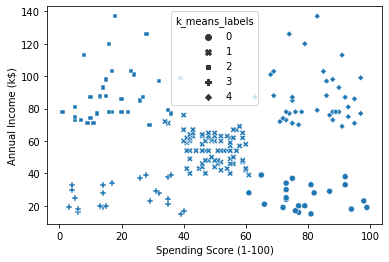

In [1359]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", style="k_means_labels")

    Category 0 -  Low Income High Spending Category
    Category 1 -  Medium Income Medium Spending
    Category 2 -  High Income Low Spending Category
    Category 3 -  Low Income Low Spending Category
    Category 4 -  High Income High Spending Category

### Exporting our trained model

In [1360]:
import pickle

In [1361]:
filename = 'model.sav'

In [1362]:
pickle.dump(k_means, open(filename, 'wb'))

In [1363]:
loaded_kmeans = pickle.load(open(filename, 'rb'))
x = loaded_kmeans.predict([[10, 89]])

/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [1364]:
x

array([0], dtype=int32)

### Inserting our data into database using sqlite

In [1365]:
import sqlite3

In [1366]:
conn = sqlite3.connect('customers.db')

In [1367]:
create_sql = 'CREATE TABLE IF NOT EXISTS customers (CustomerID INTEGER, Age INTEGER, Annual_Income INTEGER, Spending_Score INTEGER,	Gender_Male INTEGER, Category INTEGER)'
cursor = conn.cursor()
cursor.execute(create_sql)

In [1368]:
for row in df.itertuples():
    insert_sql = f'INSERT into customers (CustomerID, Age, Annual_Income, Spending_Score, Gender_Male, Category) VALUES ( {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]} )'
    cursor.execute(insert_sql)

In [1369]:
conn.commit()

In [1370]:
conn.close()